In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

## Lucky Card Data

In [3]:
card_lucky = pd.read_excel('../Water Daily Sales/Raw Data/Year 2021/TwoStore_DailySale Jun-21.xlsx', sheet_name='Card_Lucky', index_col='Date', parse_dates=True)

In [4]:
card_lucky

,Month,Card No,Name,Type,Unnamed: 5,Unnamed: 6,Unnamed: 7,Old,New,New/Total,old/day,New/day,Total sold/day,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,M02,10126.0,Kumar Sichindra,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,M02,10127.0,Tang,old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,M02,10128.0,Ghieuw Clara,old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,M02,10129.0,Xuan Ho,old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,M02,10130.0,non,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
missing = card_lucky.isnull().sum()/len(card_lucky)*100
missing = missing.drop(missing[missing==0].index).sort_values(ascending=False)
missing_values = pd.DataFrame({'Missing Ratio':missing})
missing_values

,Missing Ratio
Unnamed: 21,99.997495
Unnamed: 17,99.997495
Unnamed: 16,99.992486
Unnamed: 20,99.989981
Unnamed: 18,99.982467
Unnamed: 19,99.977457
Unnamed: 7,99.809638
Unnamed: 15,99.782086
Unnamed: 14,99.762048
old/day,99.105801


In [6]:
card_lucky = card_lucky[['Name', 'Type']]

In [7]:
card_lucky.head()

,Name,Type
Date,,
2008-02-01,Kumar Sichindra,new
2008-02-01,Tang,old
2008-02-01,Ghieuw Clara,old
2008-02-01,Xuan Ho,old
2008-02-01,non,new


In [8]:
card_lucky = card_lucky.drop(card_lucky[card_lucky['Name']=='non'].index)

In [9]:
card_lucky.nunique()

Name    10958
Type        9
dtype: int64

In [10]:
card_lucky['Type'].unique()

array(['old', 'new', nan, 'Union', 'Old', 'New', 'Union ', 'replace',
       'Void', 'Replace'], dtype=object)

In [11]:
card_lucky['Type'] = card_lucky['Type'].replace({'new':'New', 'old':'Old', 'replace':'Replace', 'Union ':'Union'})
card_lucky = card_lucky[(card_lucky['Type'] == 'New') | (card_lucky['Type'] == 'Old')]

In [12]:
card_lucky['Type'].unique()

array(['Old', 'New'], dtype=object)

In [13]:
card_lucky = card_lucky.dropna(how='all')
card_lucky.tail()

,Name,Type
Date,,
NaT,"Hashmi, Rizwan",Old
NaT,"Klair, Harpreet",Old
NaT,"Lin, Peter",Old
NaT,"Uclaray, Brian",Old
NaT,"Varadh, Mahesh",New


In [14]:
missing_dates = card_lucky[-9:]
missing_dates.set_index('Name')
missing_dates['Date'] = pd.to_datetime('2019-09-03')
missing_dates = missing_dates.set_index(['Date'])
missing_dates

,Name,Type
Date,,
2019-09-03,"Conception, Lydia",Old
2019-09-03,"Gonzales, Angelito",Old
2019-09-03,"Bustos, Federico",Old
2019-09-03,"Gowda, Nagaraj",Old
2019-09-03,"Hashmi, Rizwan",Old
2019-09-03,"Klair, Harpreet",Old
2019-09-03,"Lin, Peter",Old
2019-09-03,"Uclaray, Brian",Old
2019-09-03,"Varadh, Mahesh",New


In [15]:
card_lucky = pd.concat([card_lucky[:-9], missing_dates])

In [16]:
card_lucky.tail()

,Name,Type
Date,,
2019-09-03,"Hashmi, Rizwan",Old
2019-09-03,"Klair, Harpreet",Old
2019-09-03,"Lin, Peter",Old
2019-09-03,"Uclaray, Brian",Old
2019-09-03,"Varadh, Mahesh",New


In [17]:
card_lucky.dropna()

,Name,Type
Date,,
2008-02-02,"Delacruz, Elias",Old
2008-02-02,"Park, Kichol",Old
2008-02-02,Hood Tim,Old
2008-02-02,"Chang, Miok",Old
2008-02-02,"Pannu, Anju",Old
...,...,...
2019-09-03,"Hashmi, Rizwan",Old
2019-09-03,"Klair, Harpreet",Old
2019-09-03,"Lin, Peter",Old


In [18]:
card_lucky = card_lucky.reset_index()

card_lucky['Date'][card_lucky['Date'] == '2005-04-27']
card_lucky['Date'].iloc[516:527] = pd.to_datetime('2008-04-27')

card_lucky['Date'][card_lucky['Date'] == '2029-08-07']
card_lucky['Date'].iloc[28620:28629] = pd.to_datetime('2019-08-07')
card_lucky = card_lucky.sort_values(by='Date')

card_lucky = card_lucky.set_index('Date')

card_lucky = card_lucky[card_lucky['Name'] != 'No Name']

In [19]:
card_lucky

,Name,Type
Date,,
2008-02-02,"Delacruz, Elias",Old
2008-02-02,"Park, Kichol",Old
2008-02-02,Hood Tim,Old
2008-02-02,"Chang, Miok",Old
2008-02-02,"Pannu, Anju",Old
...,...,...
2019-09-03,"Mansaray, Yusufu",Old
2019-09-03,"Uclaray, Brian",Old
2019-09-03,"Gonzales, Angelito",Old


In [19]:
card_lucky['Last Purchase'] = (~card_lucky['Name'].duplicated(keep='last'))#.astype(int) 
card_lucky['First Purchase'] = (~card_lucky['Name'].duplicated(keep='first'))
first_purchase_date = card_lucky.groupby(['Name'])[['First Purchase']].idxmax().reset_index()
first_purchase_date = first_purchase_date.rename(columns={'First Purchase':'First Date'})
card_lucky_reset = card_lucky.reset_index()
card_lucky = pd.merge(left=card_lucky_reset, right=first_purchase_date, left_on='Name', right_on='Name')
card_lucky = card_lucky.set_index('Date')

In [23]:
card_lucky= card_lucky.sort_index()
card_lucky = card_lucky.drop(card_lucky.iloc[-23:].index)

## Lucky Customer EDA

Text(0.5, 1.0, 'Lucky Cards Customer Type')

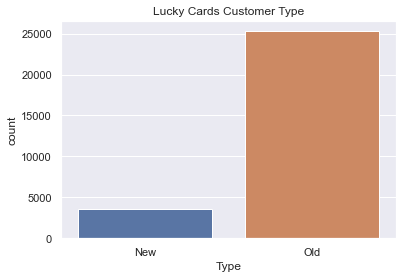

In [17]:
ax = sns.countplot(x='Type', data=card_lucky)
ax.set_title('Lucky Cards Customer Type')

<AxesSubplot:xlabel='Date', ylabel='Count'>

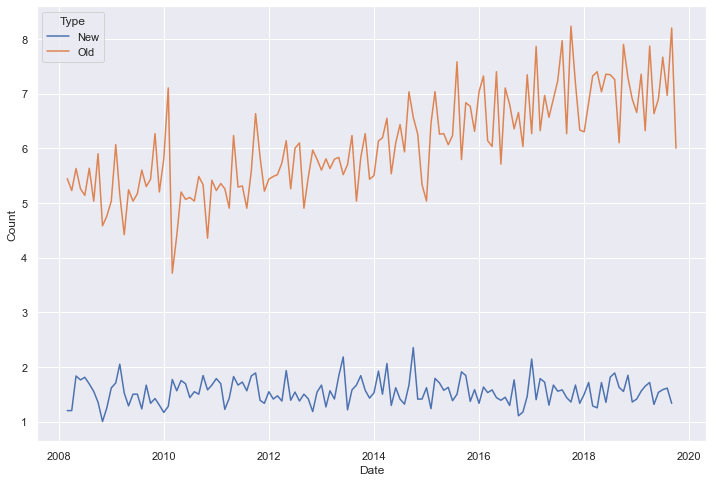

In [18]:
customer = card_lucky.groupby([card_lucky.index, 'Type']).count()[5:-6]
customer = customer.reset_index(level=1)

customer_month = customer.groupby('Type').resample(rule='M').mean()
customer_month = customer_month.reset_index(level=0)
customer_month = customer_month.rename(columns={'Name':'Count'})
customer_month.sort_index()

sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=customer_month.index, y='Count',hue='Type',data=customer_month)

<AxesSubplot:xlabel='Date', ylabel='Cumulative Sum'>

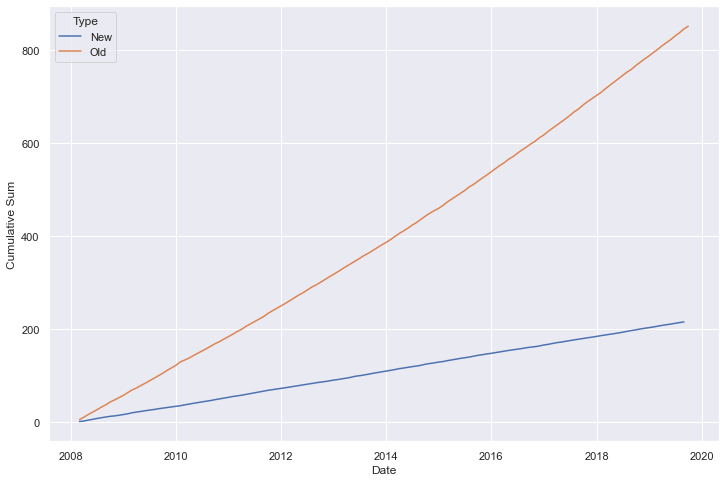

In [19]:
cumsum = card_lucky.groupby([card_lucky.index, 'Type']).count()[5:-6].groupby(level=1).cumsum()
cumsum = customer.rename(columns={'Name':'Cumulative Sum'})
#sns.lineplot(x=cumsum.index, y='Cumulative Sum',hue='Type',data=cumsum, alpha=0.5)

cumsum_month = customer.groupby('Type').resample(rule='M').mean().groupby(level=0).cumsum()
cumsum_month = cumsum_month.reset_index(level=0)
cumsum_month = cumsum_month.rename(columns={'Name':'Cumulative Sum'})
cumsum_month.sort_index()

sns.lineplot(x=cumsum_month.index, y='Cumulative Sum',hue='Type',data=cumsum_month)

## Foodmaxx Card Data

In [2]:
card_fm = pd.read_excel('../Water Daily Sales/Raw Data/Year 2021/TwoStore_DailySale Jun-21.xlsx', sheet_name='Card_FM', index_col='Date', parse_dates=True)

In [3]:
card_fm.head()

,Month,Card No,,Type,File,Unnamed: 6,Old,New,New/Total,old/day,New/day,Total sold/day,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-28,M02,101,"Himanshu, Choksh",New,File,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,102,No name,New,Take,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,103,"Shamsallah, Qasimi",New,Take,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
card_fm.columns

Index(['Month', 'Card No', ' ', 'Type', 'File', 'Unnamed: 6', 'Old', 'New',
       'New/Total', 'old/day',
       ...
       'Unnamed: 171', 'Unnamed: 172', 'Unnamed: 173', 'Unnamed: 174',
       'Unnamed: 175', 'Unnamed: 176', 'Unnamed: 177', 'Unnamed: 178',
       'Unnamed: 179', 'Unnamed: 180'],
      dtype='object', length=180)

In [5]:
card_fm = card_fm.rename(columns={' ':'Name'})

In [6]:
card_fm = card_fm[['Name', 'Type']].dropna(how='all')

card_fm = card_fm[card_fm['Name'] != 'No name']

card_fm = card_fm.drop(card_fm.index[1])

In [7]:
missing = card_fm.isnull().sum()/len(card_fm)*100
missing = missing.drop(missing[missing==0].index).sort_values(ascending=False)
missing_values = pd.DataFrame({'Missing Ratio':missing})
missing_values

,Missing Ratio
Type,0.316056
Name,0.017239


In [8]:
card_fm.dropna()

,Name,Type
Date,,
2010-02-28,"Himanshu, Choksh",New
2010-11-28,"Singh, Parminder",New
2010-11-29,Tung,New
2010-11-29,"Yeap, Nathan",Old
2010-11-30,"Quintero, Isaac",Old
...,...,...
2019-09-03,"Saini, Malkiat",Old
2019-09-03,"Nuthula, Jayapal",Old
2019-09-03,"Kittur, Narayan",Old


In [9]:
card_fm['Type'].unique()

array(['New', 'Old', 'Transfer', 'Return', nan, 'New ', 'Old ',
       'From Lucky', 'Olf', 'replacement', 'Ne', 'Replacement', 'Odl',
       'new', 'ReplaceCard', 'Tranfer'], dtype=object)

In [10]:
card_fm['Type'].value_counts()

Old            13326
New             3987
New               10
Old                6
Transfer           5
Replacement        3
Olf                2
new                1
Return             1
Ne                 1
From Lucky         1
Odl                1
ReplaceCard        1
Tranfer            1
replacement        1
Name: Type, dtype: int64

In [11]:
card_fm['Type'] = card_fm['Type'].replace({'New ':'New', 'Old ':'Old', 'Olf':'Old', 'Odl':'Old', 'Ne':'New', 'new':'New'})
card_fm = card_fm[(card_fm['Type'] == 'New') | (card_fm['Type'] == 'Old')]
card_fm['Type'].unique()

array(['New', 'Old'], dtype=object)

In [12]:
card_fm = card_fm[card_fm['Name'] != 'No Name']
card_fm['Last Purchase'] = (~card_fm['Name'].duplicated(keep='last'))#.astype(int) 
card_fm['First Purchase'] = (~card_fm['Name'].duplicated(keep='first'))

In [13]:
card_fm = card_fm.reset_index()

In [14]:
card_fm[card_fm['Date']=='2024-10-23']

,Date,Name,Type,Last Purchase,First Purchase
12068,2024-10-23,"Nagarajan, Vijay",Old,False,False


In [15]:
card_fm.iloc[12065:12070]

,Date,Name,Type,Last Purchase,First Purchase
12065,2017-10-23,"Sudula, Ashwini",Old,True,False
12066,2017-10-23,"Chirra, Sangram",Old,False,False
12067,2017-10-23,"Veldanda, Praveen",Old,False,False
12068,2024-10-23,"Nagarajan, Vijay",Old,False,False
12069,2017-10-24,"Kakar, Basir",Old,False,False


In [16]:
card_fm['Date'].iloc[7530:7533] = '2015-10-20'
card_fm['Date'].iloc[9567:9577] = '2016-10-01'
card_fm['Date'].iloc[12068] = '2017-10-23'
card_fm['Date'].iloc[16039:16046] = '2019-03-31'
card_fm['Date'].iloc[16046:16056] = '2019-04-01'
card_fm['Date'].iloc[16056:16064] = '2019-04-02'

In [17]:
card_fm['Date'] = pd.to_datetime(card_fm['Date'])
card_fm = card_fm.set_index('Date')

In [25]:
card_fm = card_fm.sort_index()

In [36]:
card_fm = card_fm[6:-44]

In [37]:
first_purchase_date = card_fm.groupby(['Name'])[['First Purchase']].idxmax().reset_index()
first_purchase_date = first_purchase_date.rename(columns={'First Purchase':'First Date'})
card_fm_reset = card_fm.reset_index()
card_fm = pd.merge(left=card_fm_reset, right=first_purchase_date, left_on='Name', right_on='Name')
card_fm = card_fm.set_index('Date')

In [38]:
card_fm = card_fm.sort_index()

## Foodmaxx Customer EDA

Text(0.5, 1.0, 'FM Cards Customer Type')

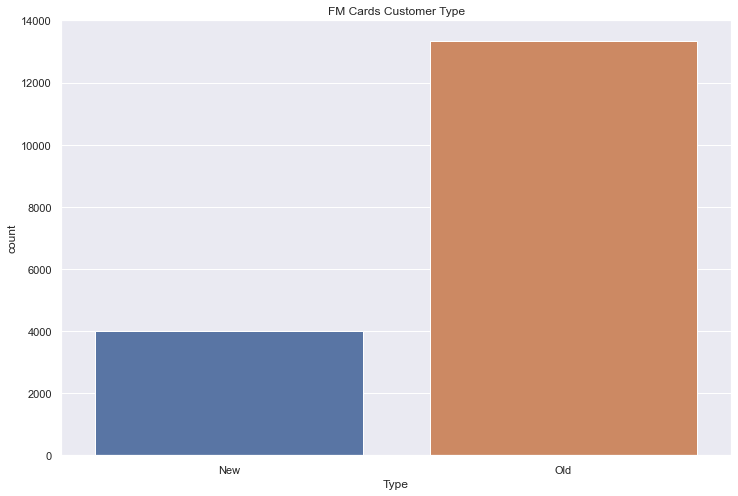

In [30]:
ax = sns.countplot(x='Type', data=card_fm)
ax.set_title('FM Cards Customer Type')

In [ ]:
card_fm

In [15]:
card_fm.tail(40)

,Name,Type,Last Purchase,First Purchase,First Date
Date,,,,,
2019-08-24,"Atturi, Vamsi",Old,True,True,2019-08-24
2019-08-24,"Uma, M.",Old,True,True,2019-08-24
2019-08-24,"Aye, Kyul, Steven",Old,True,True,2019-08-24
2019-08-24,"Bowu, Naveen",Old,True,True,2019-08-24
2019-08-24,"Daggula, Jaya",Old,True,True,2019-08-24
2019-08-24,"Boppudi, Hari",New,True,True,2019-08-24
2019-08-24,"Gorle, Sandeep",New,True,True,2019-08-24
2019-08-24,"Singh, Tarlochan",New,True,True,2019-08-24
2019-08-25,"Dargula, Chandra",New,True,True,2019-08-25


In [31]:
customer = card_fm.groupby([card_fm.index, 'Type']).count()[5:-6]

In [32]:
customer = customer.reset_index(level=1)

In [33]:
customer_month = customer.groupby('Type').resample(rule='M').mean()
customer_month = customer_month.reset_index(level=0)
customer_month = customer_month.rename(columns={'Name':'Count'})
customer_month.sort_index()

,Type,Count
Date,,
2010-11-30,New,1.000000
2010-11-30,Old,1.000000
2010-12-31,New,1.833333
2010-12-31,Old,2.315789
2011-01-31,New,2.000000
...,...,...
2019-07-31,New,1.571429
2019-08-31,Old,7.032258
2019-08-31,New,2.250000


<AxesSubplot:xlabel='Date', ylabel='Count'>

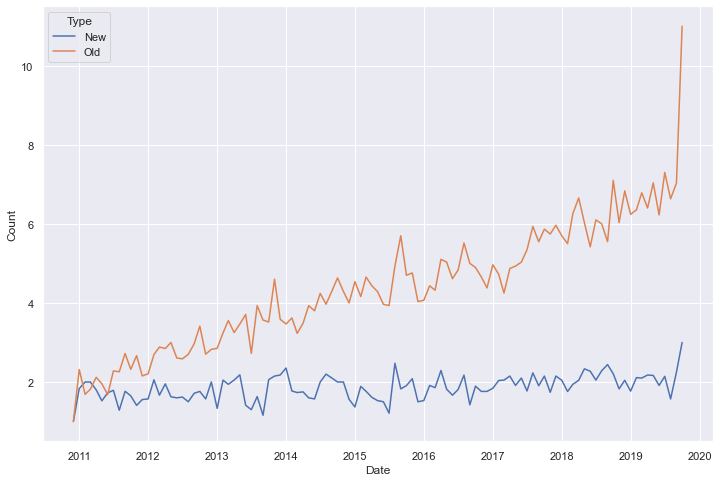

In [34]:
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=customer_month.index, y='Count',hue='Type',data=customer_month)

In [35]:
cumsum = card_fm.groupby([card_fm.index, 'Type']).count()[5:-6].groupby(level=1).cumsum()
cumsum = customer.rename(columns={'Name':'Cumulative Sum'})
#sns.lineplot(x=cumsum.index, y='Cumulative Sum',hue='Type',data=cumsum, alpha=0.5)

In [36]:
cumsum_month = customer.groupby('Type').resample(rule='M').mean().groupby(level=0).cumsum()
cumsum_month = cumsum_month.reset_index(level=0)
cumsum_month = cumsum_month.rename(columns={'Name':'Cumulative Sum'})
cumsum_month.sort_index()

,Type,Cumulative Sum
Date,,
2010-11-30,New,1.000000
2010-11-30,Old,1.000000
2010-12-31,New,2.833333
2010-12-31,Old,3.315789
2011-01-31,New,4.833333
...,...,...
2019-07-31,New,193.863326
2019-08-31,Old,456.696446
2019-08-31,New,196.113326


<AxesSubplot:xlabel='Date', ylabel='Cumulative Sum'>

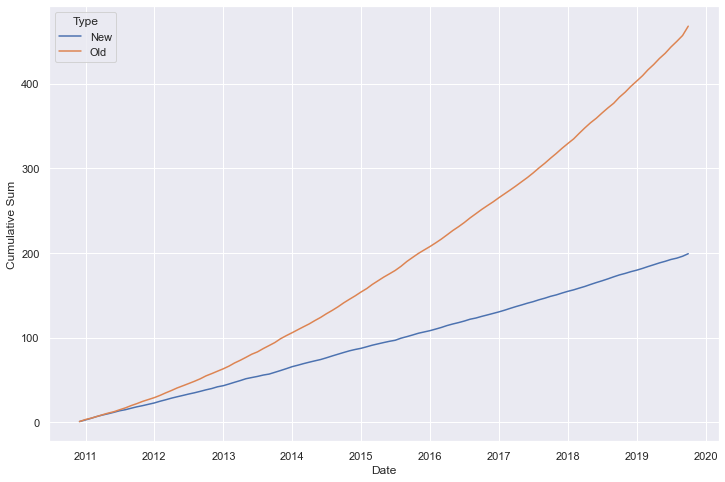

In [37]:
sns.lineplot(x=cumsum_month.index, y='Cumulative Sum',hue='Type',data=cumsum_month)

In [ ]:
fm.sort_index().tail(40)

## Exporting Files

In [39]:
card_lucky.to_csv('card_lucky.csv')
card_fm.to_csv('card_fm.csv')